In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
import warnings

N = 9 
col1 = N % 5
col2 = (N**2) % 5 + 5

print(f"Выбранные столбцы: {col1} и {col2}")

df = pd.read_csv('/Users/qooriq/PycharmProjects/oiad-1-2025/datasets/students_simple.csv')
x = df.iloc[:, col1].dropna().values
y = df.iloc[:, col2].dropna().values

print(f"Размер выборки: {len(x)}")
print(f"Переменная X: {df.columns[col1]}")
print(f"Переменная Y: {df.columns[col2]}")


Выбранные столбцы: 4 и 6
Размер выборки: 20
Переменная X: pages
Переменная Y: bmi


In [6]:
print("\n" + "="*50)
print("1. РАСЧЕТ КОРРЕЛЯЦИЙ")
print("="*50)
n = len(x)

def fechner_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    x_sign = np.sign(x - x_mean)
    y_sign = np.sign(y - y_mean)
    
    matches = np.sum(x_sign == y_sign)
    mismatches = np.sum(x_sign != y_sign)
    
    K = (matches - mismatches) / len(x)
    return K

fechner = fechner_corr(x, y)
print(f"Корреляция Фехнера: {fechner:.4f}")

r_pearson, p_pearson = stats.pearsonr(x, y)  
alpha = 0.05
z = np.arctanh(r_pearson)
se = 1 / np.sqrt(n - 3)
z_crit = stats.norm.ppf(1 - alpha/2)
z_low, z_high = z - z_crit*se, z + z_crit*se
ci_low, ci_high = np.tanh((z_low, z_high))

print(f"Корреляция Пирсона: {r_pearson:.4f}")
print(f"Доверительный интервал Пирсона (95%): [{ci_low:.4f}, {ci_high:.4f}]")

r_spearman, p_spearman = stats.spearmanr(x, y)
print(f"Корреляция Спирмена: {r_pearson:.4f}")

r_kendall, p_kendall = stats.kendalltau(x, y)
print(f"Корреляция Кенделла: {r_kendall:.4f}")


1. РАСЧЕТ КОРРЕЛЯЦИЙ
Корреляция Фехнера: -0.4000
Корреляция Пирсона: -0.1795
Доверительный интервал Пирсона (95%): [-0.5762, 0.2857]
Корреляция Спирмена: -0.1795
Корреляция Кенделла: -0.2442



2. ВИЗУАЛИЗАЦИЯ


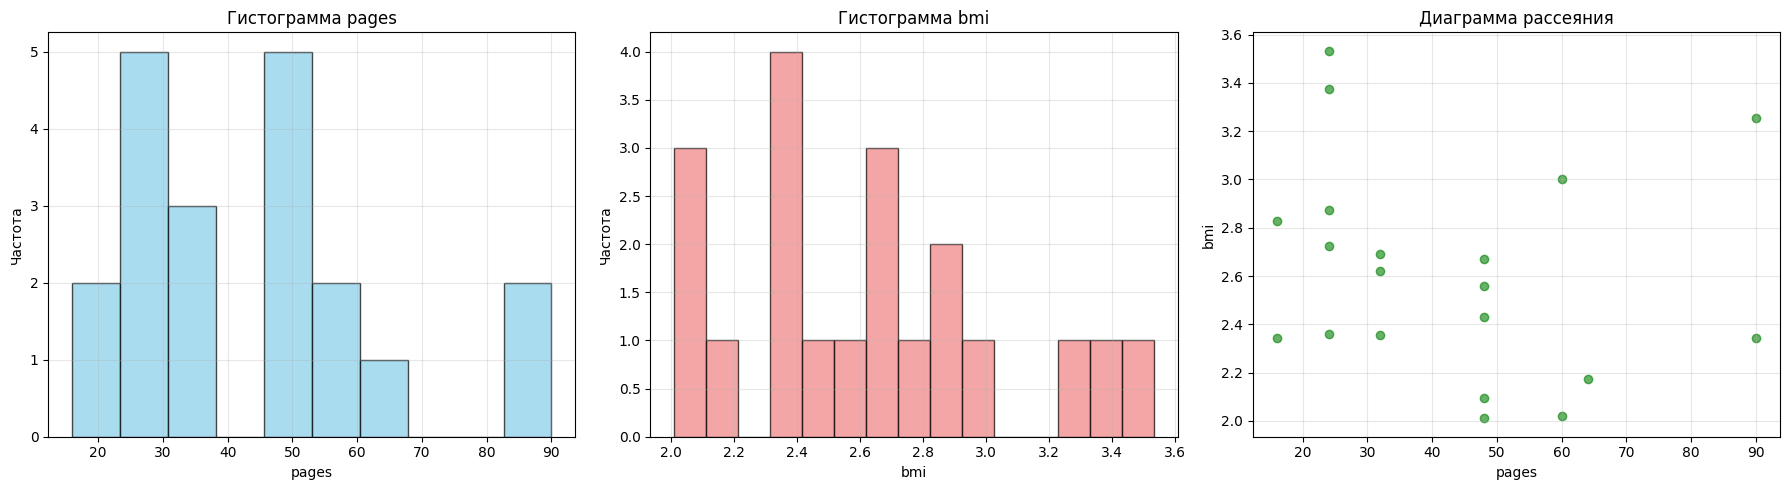

In [7]:
# 2. ВИЗУАЛИЗАЦИЯ
print("\n" + "="*50)
print("2. ВИЗУАЛИЗАЦИЯ")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(x, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_xlabel(f'{df.columns[col1]}')
axes[0].set_ylabel('Частота')
axes[0].set_title(f'Гистограмма {df.columns[col1]}')
axes[0].grid(True, alpha=0.3)

axes[1].hist(y, bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_xlabel(f'{df.columns[col2]}')
axes[1].set_ylabel('Частота')
axes[1].set_title(f'Гистограмма {df.columns[col2]}')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(x, y, alpha=0.6, color='green')
axes[2].set_xlabel(f'{df.columns[col1]}')
axes[2].set_ylabel(f'{df.columns[col2]}')
axes[2].set_title(f'Диаграмма рассеяния')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



3. УРАВНЕНИЯ РЕГРЕССИИ
Linear  {'type': 'linear', 'params': {'w0': np.float64(-0.0035606872223673818), 'w1': np.float64(2.7650352756728505)}, 'y_pred': array([2.67957878, 2.65109328, 2.67957878, 2.67957878, 2.55139404,
       2.70806428, 2.44457343, 2.67957878, 2.59412229, 2.67957878,
       2.70806428, 2.59412229, 2.65109328, 2.59412229, 2.53715129,
       2.59412229, 2.44457343, 2.59412229, 2.65109328, 2.55139404]), 'k': 1} 

Quadratic  {'type': 'quadratic', 'params': array([ 3.26859996e-04, -3.71289611e-02,  3.45176411e+00]), 'y_pred': array([2.7489404 , 2.59834199, 2.7489404 , 2.7489404 , 2.40072243,
       2.94137689, 2.75772358, 2.7489404 , 2.42265941, 2.7489404 ,
       2.94137689, 2.42265941, 2.59834199, 2.42265941, 2.41432914,
       2.42265941, 2.75772358, 2.42265941, 2.59834199, 2.40072243]), 'k': 2} 

Hyper   {'params': {'w1': np.float64(7.340668504618368), 'w0': np.float64(2.3922378497306793)}, 'y_pred': array([2.69809904, 2.62163374, 2.69809904, 2.69809904, 2.51458232,
 

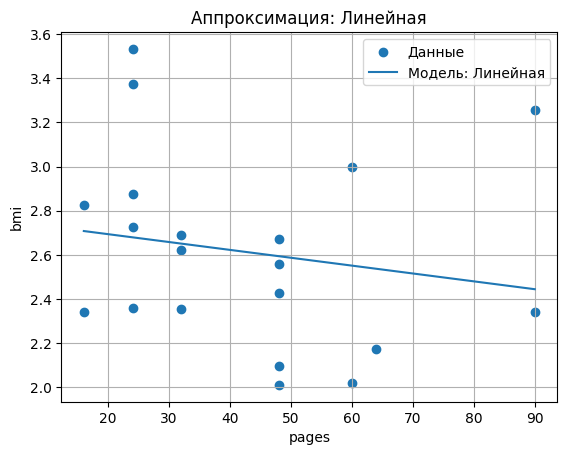

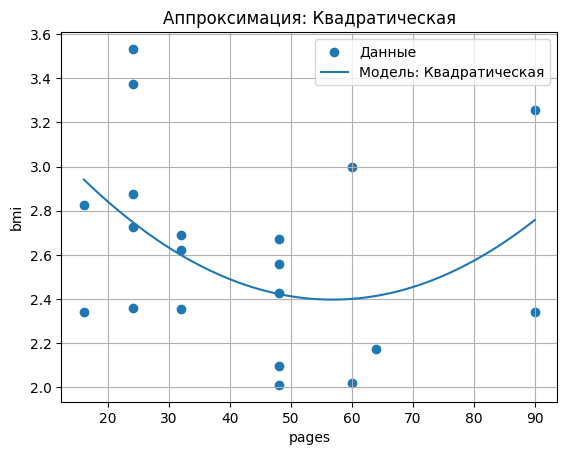

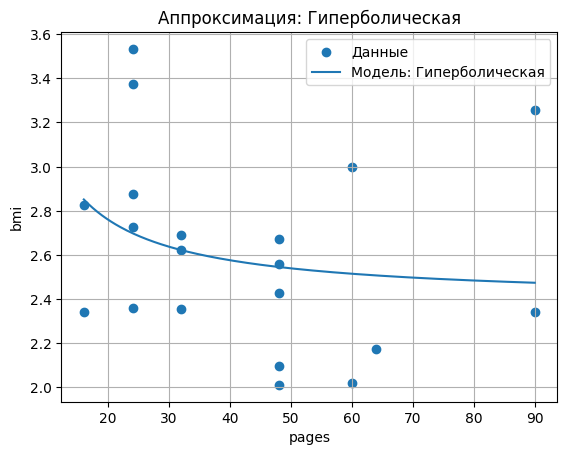

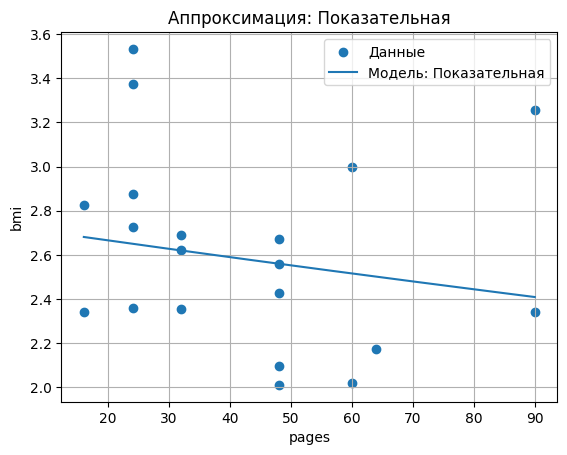

In [8]:
# 3. УРАВНЕНИЯ РЕГРЕССИИ
print("\n" + "="*50)
print("3. УРАВНЕНИЯ РЕГРЕССИИ")
print("="*50)

models = {}

x_grid = np.linspace(np.min(x), np.max(x), 200)
coeffs_lin = np.polyfit(x, y, 1)
pred_lin = np.polyval(coeffs_lin, x)
y_grid_lin = coeffs_lin[0] * x_grid + coeffs_lin[1]
models['linear'] = {
    'type': 'linear',
    'params': {'w0': coeffs_lin[0], 'w1': coeffs_lin[1]},
    'y_pred': pred_lin,
    'k': 1
}

# 2. Квадратичная y = w2*x^2 + w1*x + w0
coeffs_quad = np.polyfit(x, y, 2)
pred_quad = np.polyval(coeffs_quad, x)
y_grid_quadr = coeffs_quad[0] * x_grid ** 2 + coeffs_quad[1] * x_grid + coeffs_quad[2]
models['quadratic'] = {
    'type': 'quadratic',
    'params': coeffs_quad,
    'y_pred': pred_quad,
    'k': 2
}

z = 1.0 / x
coef_hyp = np.polyfit(z, y, deg=1)
w1_hyp, w0_hyp = coef_hyp[0], coef_hyp[1]
y_pred_hyp = w1_hyp * (1.0 / x) + w0_hyp
y_grid_hyp = coef_hyp[0] * (1.0 / x_grid) + coef_hyp[1]
models['hyper'] = {
    'params': {'w1': w1_hyp, 'w0': w0_hyp},
    'y_pred': y_pred_hyp,
    'k': 1
}

lny = np.log(y)
coef_exp = np.polyfit(x, lny, deg=1) 
lnw1, lnw0 = coef_exp[0], coef_exp[1]
w1_exp = np.exp(lnw1)
w0_exp = np.exp(lnw0)
y_pred_exp = w0_exp * (w1_exp ** x)
y_grid_exp = w0_exp * (w1_exp ** x_grid)
models['ln'] = {
    'params': {'w1': w1_exp, 'w0': w0_exp},
    'y_pred': y_pred_exp,
    'k': 1  # x
}

print("Linear ", models['linear'], "\n")
print("Quadratic ", models['quadratic'], "\n")
print("Hyper  ", models['hyper'], "\n")
print("Ln  ", models['ln'], "\n")

plt.figure()
plt.scatter(x, y, marker='o', label='Данные')
plt.plot(x_grid, y_grid_lin, label=f'Модель: Линейная')
plt.title(f"Аппроксимация: Линейная")
plt.xlabel(df.columns[col1])
plt.ylabel(df.columns[col2])
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.scatter(x, y, marker='o', label='Данные')
plt.plot(x_grid, y_grid_quadr, label=f'Модель: Квадратическая')
plt.title(f"Аппроксимация: Квадратическая")
plt.xlabel(df.columns[col1])
plt.ylabel(df.columns[col2])
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.scatter(x, y, marker='o', label='Данные')
plt.plot(x_grid, y_grid_hyp, label=f'Модель: Гиперболическая')
plt.title(f"Аппроксимация: Гиперболическая")
plt.xlabel(df.columns[col1])
plt.ylabel(df.columns[col2])
plt.grid(True)
plt.legend()
plt.show()

plt.figure()
plt.scatter(x, y, marker='o', label='Данные')
plt.plot(x_grid, y_grid_exp, label=f'Модель: Показательная')
plt.title(f"Аппроксимация: Показательная")
plt.xlabel(df.columns[col1])
plt.ylabel(df.columns[col2])
plt.grid(True)
plt.legend()
plt.show()

In [9]:
print("\n" + "="*50)
print("4. КРИТЕРИЙ ФИШЕРА ДЛЯ ВСЕХ МОДЕЛЕЙ")
print("="*50)

alpha = 0.05
n = len(y)
results = {}

def fisher_test(model_name, model):
    y_pred = model['y_pred']
    k = model['k']
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    R2 = 1 - ss_res / ss_tot
    F = (R2 / k) / ((1 - R2) / (n - k - 1))
    F_crit = stats.f.ppf(1 - alpha, k, n - k - 1)
    p_value = 1 - stats.f.cdf(F, k, n - k - 1)
    
    results[model_name] = {
        "R2": R2,
        "F": F,
        "Fcrit": F_crit,
        "p_value": p_value,
        "k": k
    }

for name, model in models.items():
    fisher_test(name, model)

for name, res in results.items():
    print(f"\nМодель: {name.upper()}")
    print(f"  R² = {res['R2']:.4f}")
    print(f"  F = {res['F']:.4f}")
    print(f"  F критическое (α={alpha}): {res['Fcrit']:.4f}")
    print(f"  p-value = {res['p_value']:.6f}")
    if res['F'] > res['Fcrit']:
        print("Модель статистически значима")
    else:
        print("Модель НЕзначима (F ≤ F_crit)")

best_model = max(results, key=lambda m: results[m]["R2"])
worst_model = min(results, key=lambda m: results[m]["R2"])

print("\n" + "="*50)
print("5. СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*50)
print(f"Лучшая модель:  {best_model.upper()}  (R² = {results[best_model]['R2']:.4f})")
print(f"Худшая модель:  {worst_model.upper()}  (R² = {results[worst_model]['R2']:.4f})")



4. КРИТЕРИЙ ФИШЕРА ДЛЯ ВСЕХ МОДЕЛЕЙ

Модель: LINEAR
  R² = 0.0322
  F = 0.5993
  F критическое (α=0.05): 4.4139
  p-value = 0.448911
Модель НЕзначима (F ≤ F_crit)

Модель: QUADRATIC
  R² = 0.1830
  F = 1.9036
  F критическое (α=0.05): 3.5915
  p-value = 0.179467
Модель НЕзначима (F ≤ F_crit)

Модель: HYPER
  R² = 0.0670
  F = 1.2924
  F критическое (α=0.05): 4.4139
  p-value = 0.270509
Модель НЕзначима (F ≤ F_crit)

Модель: LN
  R² = 0.0289
  F = 0.5358
  F критическое (α=0.05): 4.4139
  p-value = 0.473603
Модель НЕзначима (F ≤ F_crit)

5. СРАВНЕНИЕ МОДЕЛЕЙ
Лучшая модель:  QUADRATIC  (R² = 0.1830)
Худшая модель:  LN  (R² = 0.0289)
